In [1]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'
import numpy as np
import itertools

In [2]:
from PWE_Diagnostic_Lattice_Tool.BitConstraintMap import BitConstraintMap
from PWE_Diagnostic_Lattice_Tool.ConstraintMap import ConstraintMap
from PWE_Diagnostic_Lattice_Tool.PowersetFullLatticeViz import PowersetFullLatticeViz
from PWE_Diagnostic_Lattice_Tool.PowersetBitLib import PowersetBitLib
from PWE_Diagnostic_Lattice_Tool.ASP_LogicProgram import ASP_LogicProgram
from PWE_Diagnostic_Lattice_Tool.DiagnosisAlgorithms import DiagnosisAlgorithms
from PWE_Diagnostic_Lattice_Tool.PowersetSummaryLatticeViz import PowersetSummaryLatticeViz

In [3]:
%load_ext PWE_NB_Extension

In [4]:
from PW_explorer.run_clingo import run_clingo
from PW_explorer.load_worlds import load_worlds

In [5]:
%%clingo --donot-display_input -n=0 -lci test_cnf


var(a) ; not var(a).
var(b) ; not var(b).

var(a)          :- comp(a).
not var(a)      :- comp(na).
var(b)          :- comp(b).
not var(b)      :- comp(nb).
var(a) ; var(b) :- comp(aorb).

#show var/1.

Output:


'Answer: 1\n\nAnswer: 2\nvar(a)\nAnswer: 3\nvar(b)\nAnswer: 4\nvar(b) var(a)\nSATISFIABLE\n\nModels       : 4\nCalls        : 1\nTime         : 0.001s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.001s'

In [6]:
cmap = BitConstraintMap(['a', 'b', 'na', 'nb', 'aorb'])

In [7]:
cnf_prog = ASP_LogicProgram(test_cnf)

In [8]:
%%time
mus_es, mss_es = DiagnosisAlgorithms.marco_bit_optimized(cmap, cnf_prog)

CPU times: user 207 ms, sys: 66.3 ms, total: 273 ms
Wall time: 415 ms


In [9]:
mus_es, mss_es

([{'a', 'na'}, {'aorb', 'na', 'nb'}, {'b', 'nb'}],
 [{'a', 'aorb', 'b'}, {'aorb', 'b', 'na'}, {'a', 'aorb', 'nb'}, {'na', 'nb'}])

In [10]:
mus_es = set([cmap.constraint_set_to_int(mus) for mus in mus_es])
mss_es = set([cmap.constraint_set_to_int(mss) for mss in mss_es])
mus_es, mss_es

({7, 10, 20}, {6, 13, 19, 25})

In [11]:
lattice_viz = PowersetFullLatticeViz(cmap)

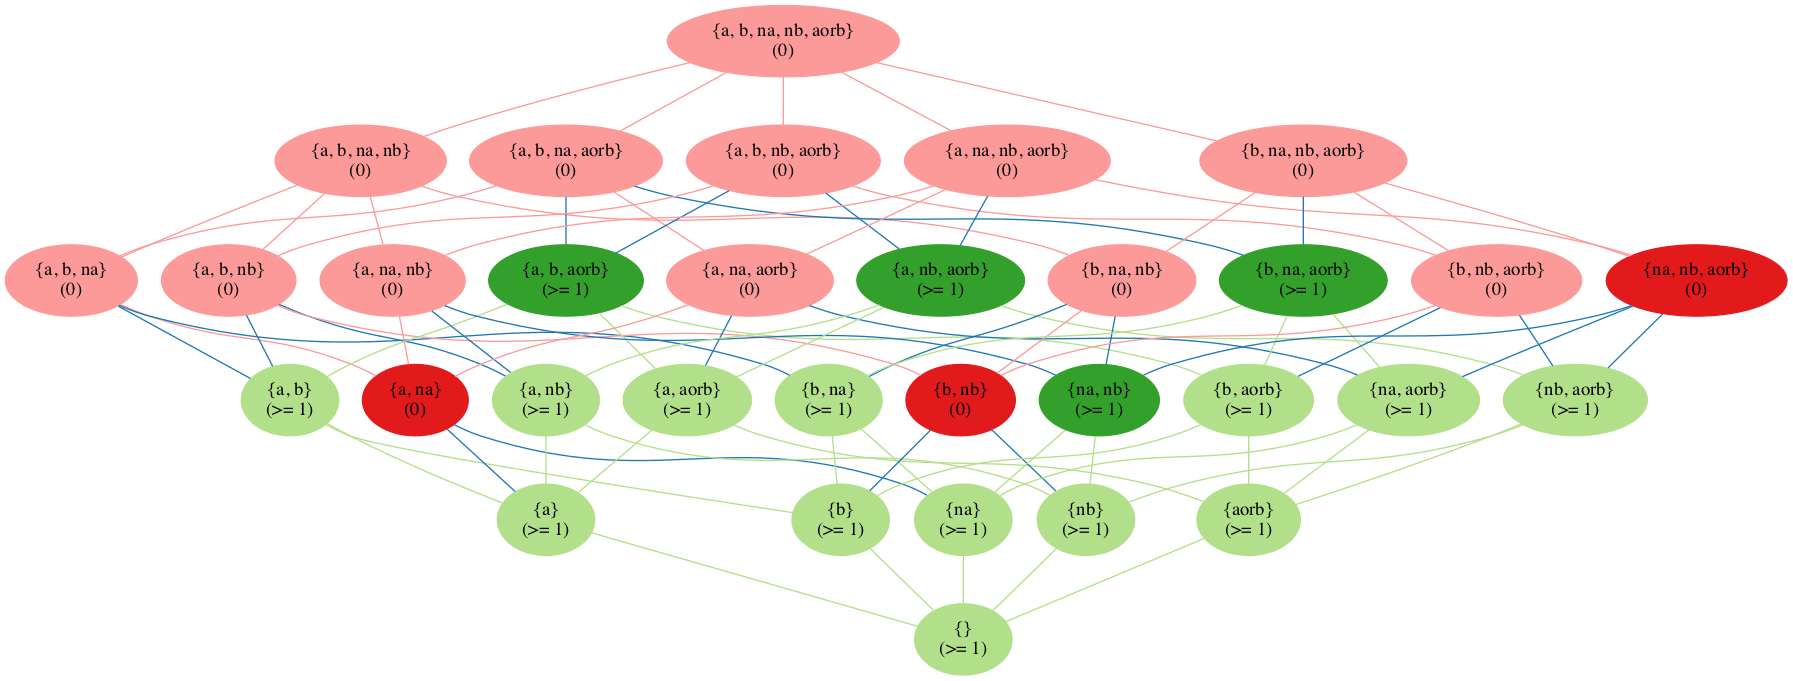

In [12]:
draw(lattice_viz.get_full_lattice(label_format='comp_string', display_num_pws=True, to_highlight=('MUS', 'MSS')))

In [13]:
summ_lattice_viz = PowersetSummaryLatticeViz(cmap)

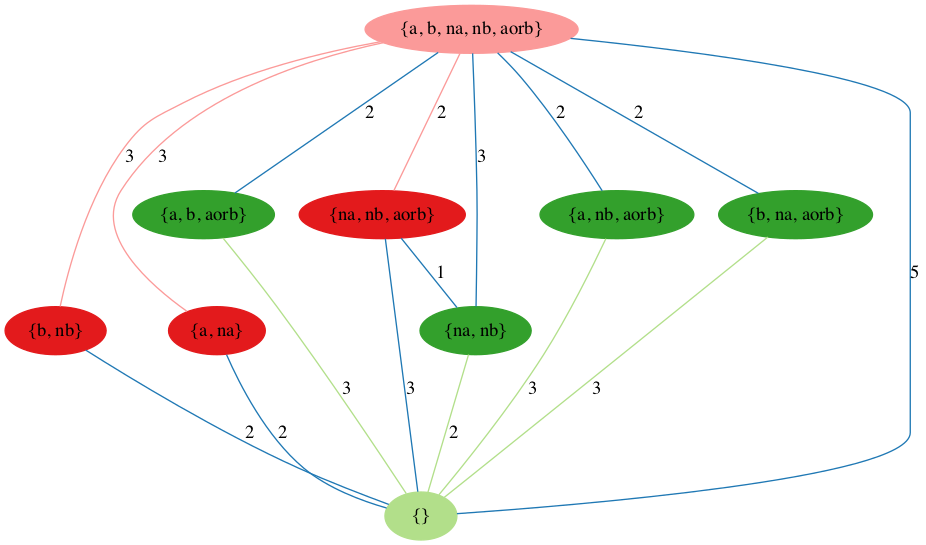

In [14]:
draw(summ_lattice_viz.get_lattice(label_format='comp_string'))

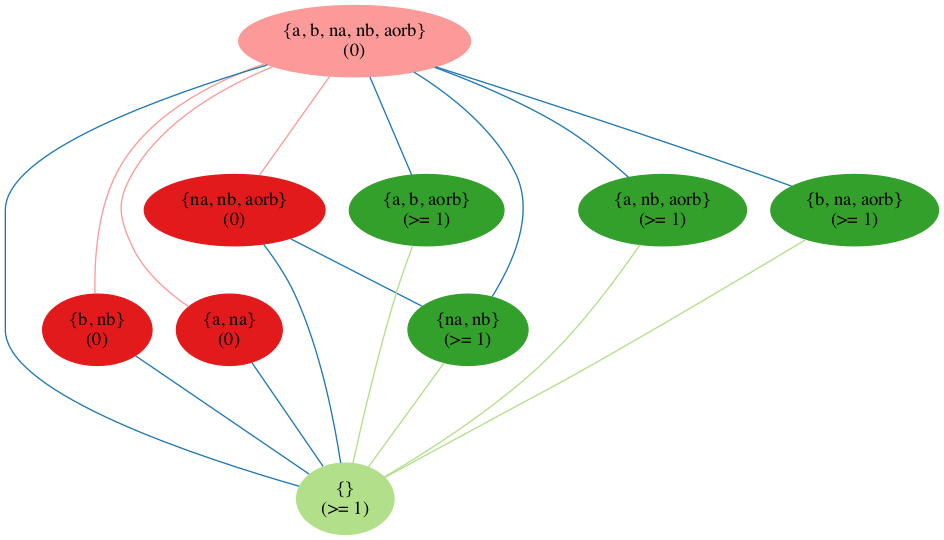

In [15]:
draw(summ_lattice_viz.get_lattice(display_num_pws=True, add_edge_labels=False, label_format='comp_string'))

In [16]:
%%time
cmap.reset_explored_set()
muas_es, mas_es = DiagnosisAlgorithms.marco_ambiguous_bit_optimized(cmap, cnf_prog)
print(muas_es, mas_es)

[{'na', 'nb'}, {'na', 'b'}, {'a', 'b'}, {'nb', 'a'}, {'na', 'aorb'}, {'nb', 'aorb'}] [{'na'}, {'a', 'aorb'}, {'b', 'aorb'}, {'nb'}]
CPU times: user 153 ms, sys: 56 ms, total: 209 ms
Wall time: 310 ms


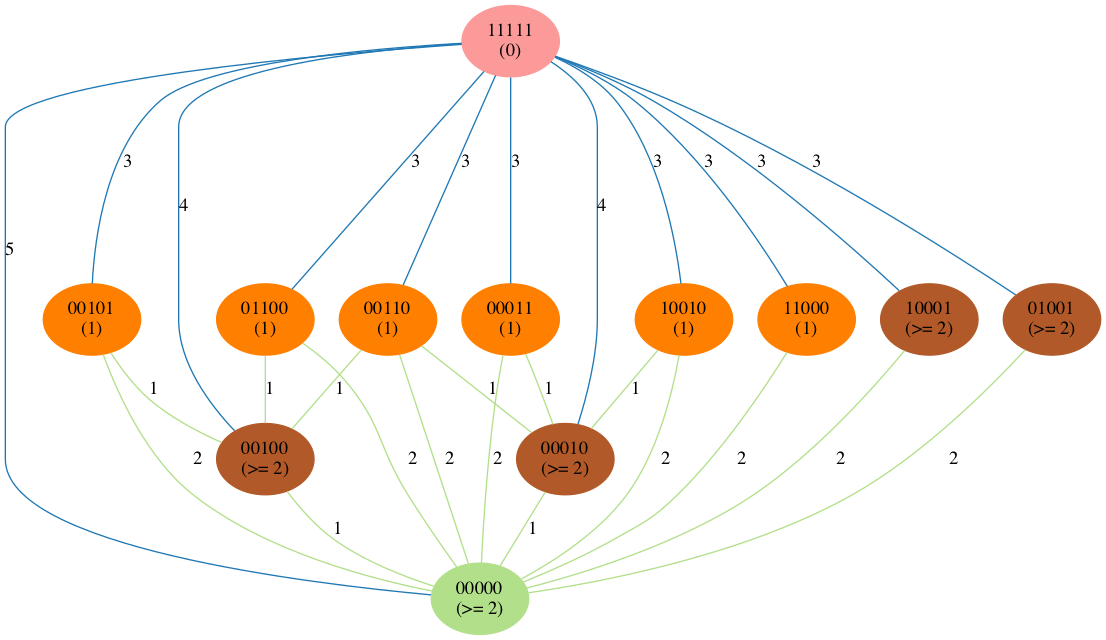

In [17]:
summ_lattice_viz.resync_lattice()
draw(summ_lattice_viz.get_lattice(to_highlight=['MAS', 'MUAS'], display_num_pws=True))

In [18]:
%%clingo --donot-display_input -n=1 -lci test_cnf2

var(a) ; not var(a).
var(b) ; not var(b).
var(c) ; not var(c).
var(d) ; not var(d).
var(e) ; not var(e).

var(a) :- comp(x1).
var(b) :- comp(x1).
var(c) ; var(d) :- comp(x1).

not var(a) :- comp(x2).
not var(b) :- comp(x2).
var(c) :- comp(x2).
var(d) :- comp(x2).

not comp(x1) :- comp(x3).

var(a) :- comp(x4).
var(d) :- comp(x4).

not var(c) :- comp(x5).
var(d) :- comp(x5).

not var(a) :- comp(x6).
var(e) :- comp(x6).
var(d) :- comp(x6).
var(c) :- comp(x6).

Output:


'Answer: 1\n\nSATISFIABLE\n\nModels       : 1+\nCalls        : 1\nTime         : 0.002s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.002s'

In [19]:
cmap = BitConstraintMap(['x1', 'x2', 'x3', 'x4', 'x5', 'x6'])
cnf_prog = ASP_LogicProgram(str(test_cnf2))

In [20]:
%%time
mus_es, mss_es = DiagnosisAlgorithms.marco_bit_optimized(cmap, cnf_prog)
print(mus_es, mss_es)

[{'x5', 'x2'}, {'x1', 'x2'}, {'x6', 'x4'}, {'x6', 'x1'}, {'x3', 'x1'}, {'x4', 'x2'}, {'x6', 'x5'}] [{'x6', 'x3', 'x2'}, {'x5', 'x4', 'x3'}, {'x4', 'x5', 'x1'}]
CPU times: user 266 ms, sys: 88.7 ms, total: 355 ms
Wall time: 530 ms


In [21]:
cmap.reset_explored_set()

In [22]:
%%time
muas_es, mas_es = DiagnosisAlgorithms.marco_ambiguous_bit_optimized(cmap, cnf_prog)
print(muas_es, mas_es)

[{'x6', 'x2'}] [{'x4', 'x5', 'x1'}, {'x3', 'x2'}, {'x6', 'x3'}, {'x5', 'x4', 'x3'}]
CPU times: user 185 ms, sys: 38.2 ms, total: 224 ms
Wall time: 279 ms


In [23]:
lattice_viz = PowersetFullLatticeViz(cmap)

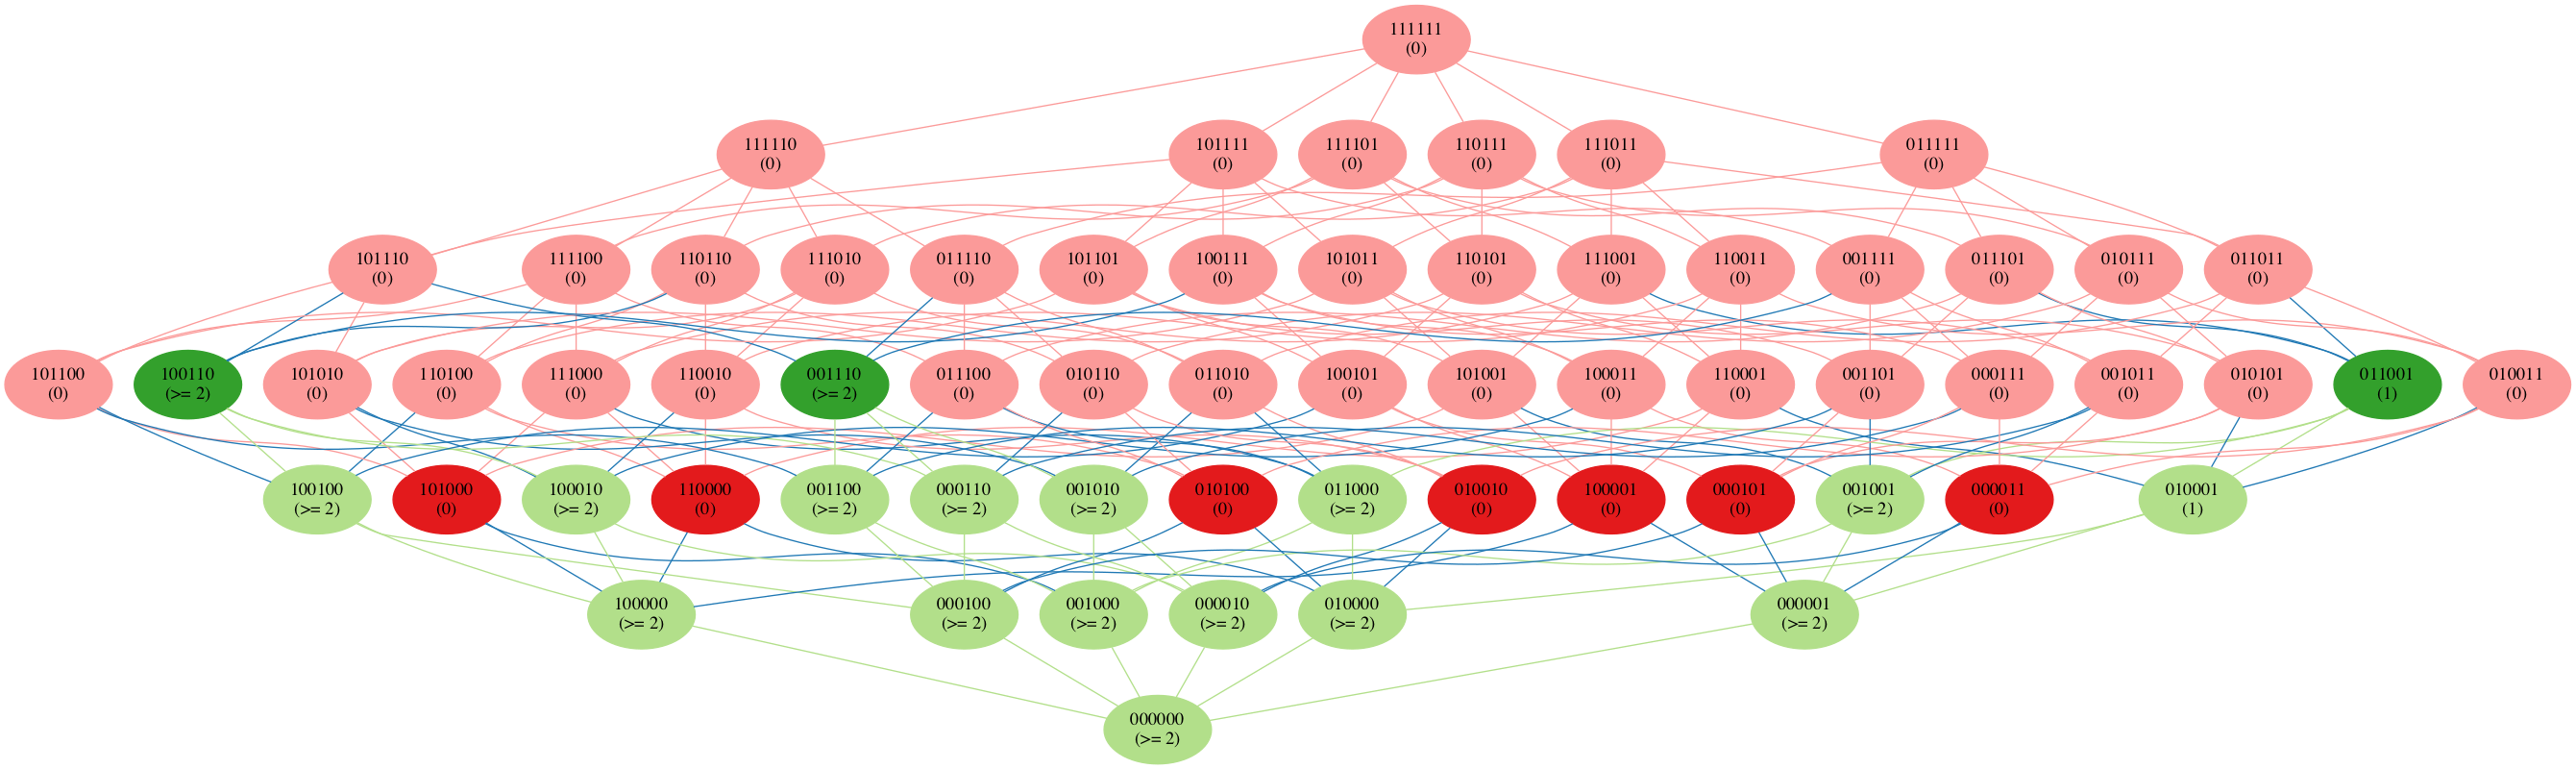

In [24]:
draw(lattice_viz.get_full_lattice(label_format='bitstring', display_num_pws=True, to_highlight=['MUS','MSS']))

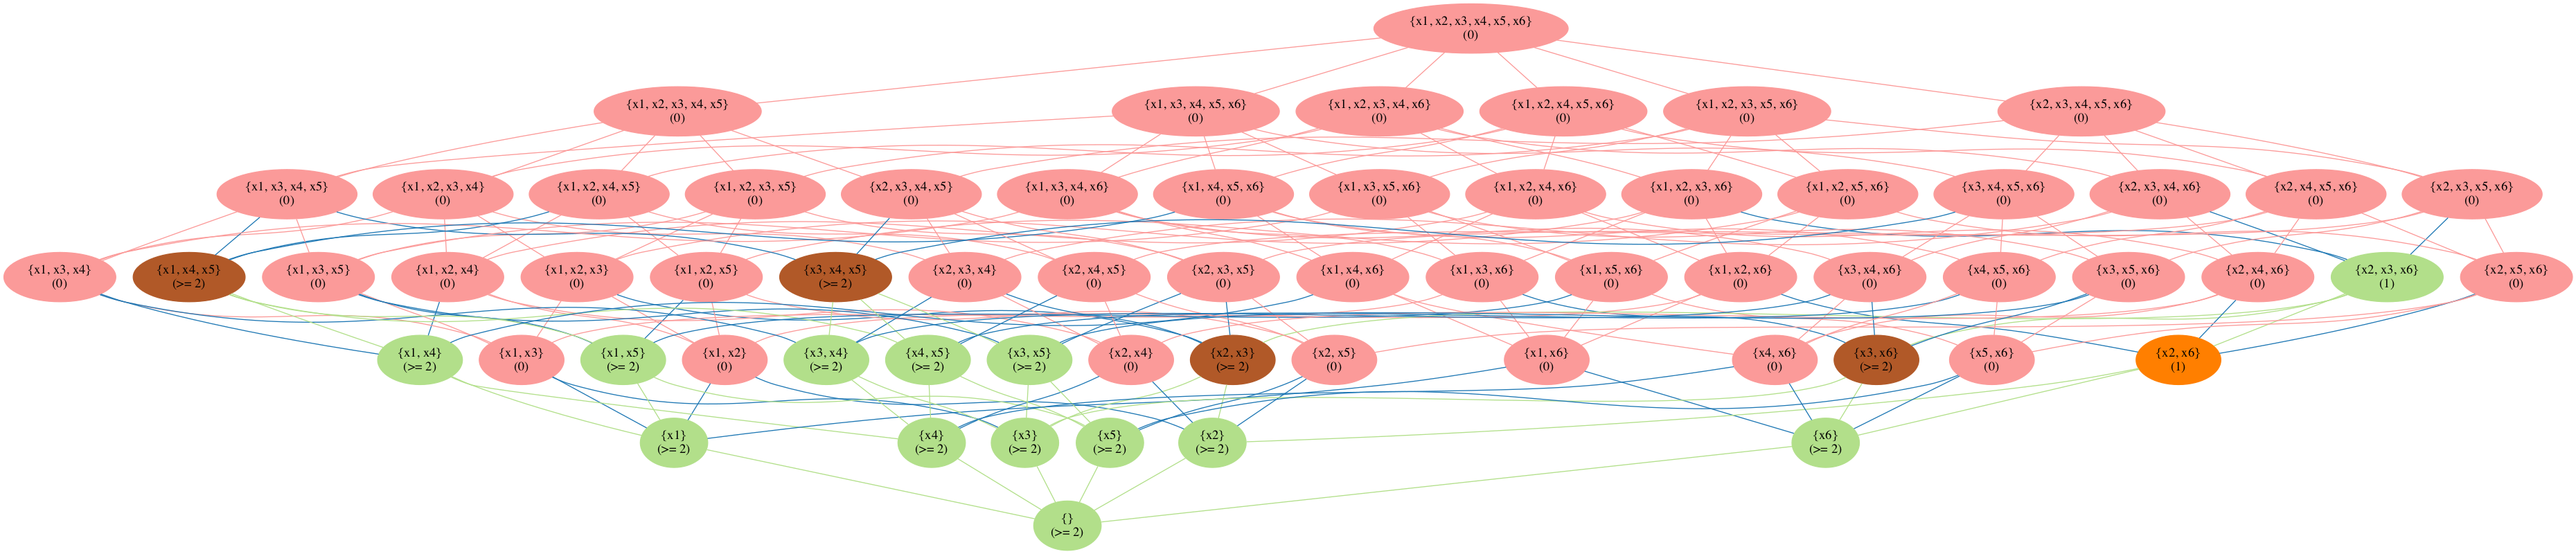

In [25]:
draw(lattice_viz.get_full_lattice(label_format='comp_string', display_num_pws=True, to_highlight=['MUAS','MAS']))

In [26]:
summ_lattice_viz = PowersetSummaryLatticeViz(cmap)

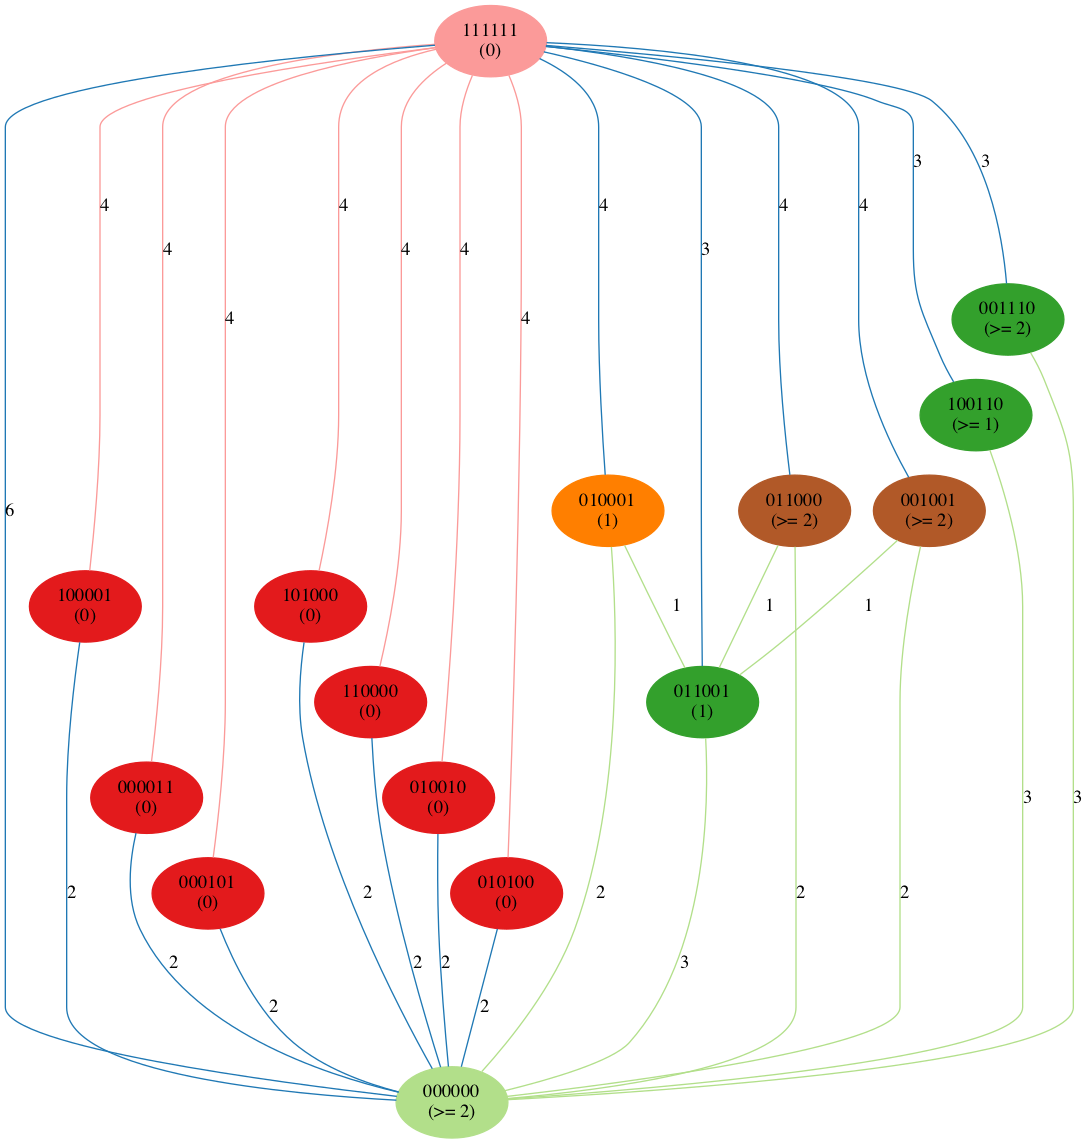

In [27]:
draw(summ_lattice_viz.get_lattice(to_highlight=['MAS', 'MSS', 'MUAS', 'MUS'], display_num_pws=True))